In [ ]:
# -*- coding: utf-8 -*-
# -*- author : Lokman Mheni - Fabio Palmisano -*-
# -*- date : 2024-04-20 -*-
# -*- Last revision: 2024-04-23 *-
# -*- python version : 3.11.9 -*-
# -*- Description: Notebook containing the previous analysis of NML 2024-*-

# <center> EE - 452: Network Machine Learning </center>
## <center> Ecole Polytechnique Fédérale de Lausanne </center>
### <center>Bookreads recommenders </center>
---

NB : This file was provided in the original github of the dataset. We just add more analysis as really first exploration of the data 

In [7]:
# Importing the libraries

import pandas as pd

r = pd.read_csv( './data/ratings.csv' )
tr = pd.read_csv( './data/to_read.csv' )
b = pd.read_csv( './data/books.csv' )

t = pd.read_csv( './data/tags.csv' )
bt = pd.read_csv( './data/book_tags.csv')


### Ratings

In [8]:
r.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


Ratings are sorted chronologically, oldest first.

In [9]:
len(r)

5976479

<Axes: >

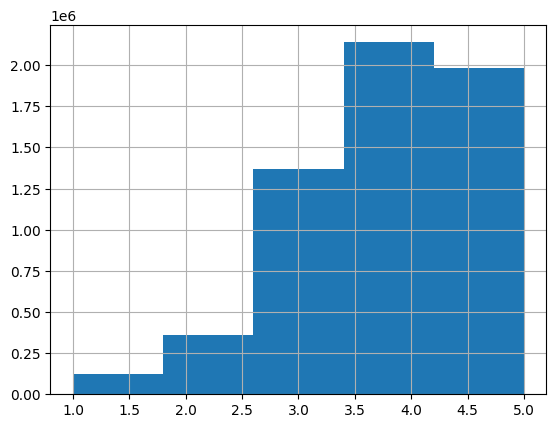

In [10]:
r.rating.hist( bins = 5 )

It appears that 4 is the most popular rating. There are relatively few ones and twos.

### To read
These are the books users marked "to read".


In [11]:
tr.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [12]:
len(tr)

912705

Most books have been marked to read by somebody. Majority of the users have some books marked to read.

In [13]:
len(tr.book_id.unique())

9986

In [14]:
len(tr.user_id.unique())

48871

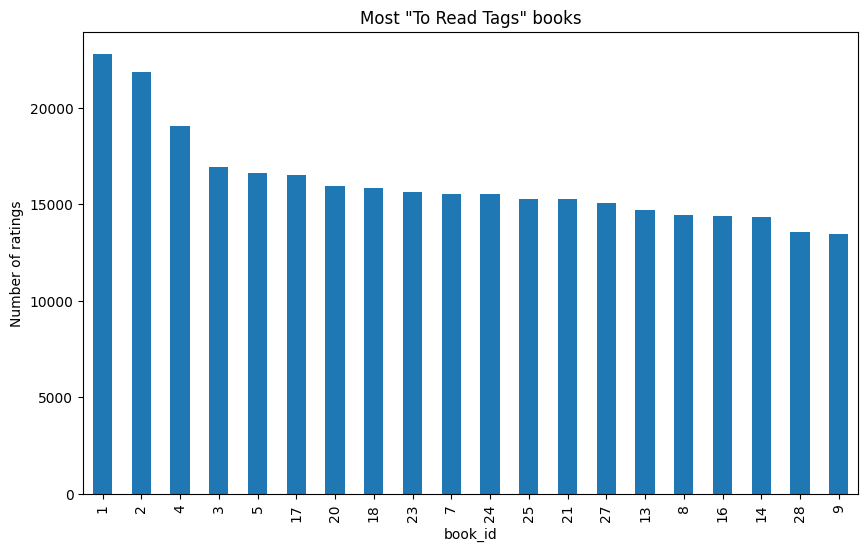

In [40]:
import matplotlib.pyplot as plt
## Make a rankings of the books that are most popular
r.groupby('book_id').book_id.count().sort_values(ascending = False)

#Make a plot to show the first 20 books that are most popular
plt.figure(figsize = (10, 6))
r.groupby('book_id').book_id.count().sort_values(ascending = False).head(20).plot(kind = 'bar')
plt.title('Most "To Read Tags" books')
plt.ylabel('Number of ratings')
plt.show()




### Books

In [16]:
b.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


Books are sorted by their popularity, as measured by number of ratings (overall, not in this dataset).

In [17]:
len(b)

10000

### User and book IDs

In [18]:
r.user_id.max()

53424

In [19]:
r.book_id.max()

10000

The IDs are contiguous.

In [20]:
assert( len( r.user_id.unique()) == r.user_id.max())
assert( len( r.book_id.unique()) == r.book_id.max())

### Reviews per book

Most books have a few hundred reviews, but some have as few as eight.

In [21]:
reviews_per_book = r.groupby( 'book_id' ).book_id.apply( lambda x: len( x ))
reviews_per_book.describe()

count    10000.000000
mean       597.647900
std       1267.289788
min          8.000000
25%        155.000000
50%        248.000000
75%        503.000000
max      22806.000000
Name: book_id, dtype: float64

In [22]:
reviews_per_book.sort_values().head( 10 )

book_id
7803     8
9345    11
9486    24
1935    33
9315    36
9553    41
8181    45
9479    48
9260    48
9705    50
Name: book_id, dtype: int64

### Reviews per user

All users have at least 19 reviews.

In [23]:
reviews_per_user = r.groupby( 'user_id' ).user_id.apply( lambda x: len( x ))
reviews_per_user.describe()

count    53424.000000
mean       111.868804
std         26.071224
min         19.000000
25%         96.000000
50%        111.000000
75%        128.000000
max        200.000000
Name: user_id, dtype: float64

In [24]:
reviews_per_user.sort_values().head( 10 )

user_id
34590    19
43675    20
40753    21
51725    21
32128    21
37640    22
16470    22
42736    22
48077    22
40299    22
Name: user_id, dtype: int64

### Tags

In [25]:
t.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [26]:
len(t)

34252

In [27]:
bt.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


Tag applications are sorted by goodreads_book_id ASC and by count DESC.

In [28]:
len(bt)

999912

Let us merge tag names into tag applications.

In [29]:
bt = bt.merge( t, on = 'tag_id' )

Why don't we merge book titles for good measure.

In [30]:
bt = bt.merge( b[[ 'goodreads_book_id', 'title']], on = 'goodreads_book_id' )

It appears that there are some negative tag counts. Let's fix this.

In [31]:
bt['count'].describe()

count    999912.000000
mean        208.869633
std        3501.265173
min          -1.000000
25%           7.000000
50%          15.000000
75%          40.000000
max      596234.000000
Name: count, dtype: float64

In [32]:
bt.loc[ bt['count'] < 0, 'count'] = 0

Sample some popular book tags.

In [33]:
bt.sample( 10, weights = 'count')

,goodreads_book_id,tag_id,count,tag_name,title
226000,39045,30574,3420,to-read,I Don't Know How She Does It
337339,93263,25147,11,read-in-2011,The Legend of Sleepy Hollow (Graphic Novel)
371700,116257,30574,8662,to-read,"The System of the World (The Baroque Cycle, #3)"
120446,14836,22330,45,on-hold,Midnight's Children
929859,19288239,8717,3270,currently-reading,Colorless Tsukuru Tazaki and His Years of Pilg...
868194,16090981,30574,17234,to-read,"Thief (Love Me with Lies, #3)"
842794,13643567,30574,17085,to-read,"The Evolution of Mara Dyer (Mara Dyer, #2)"
463303,276342,11743,158,fiction,Angel Falls
223200,38447,30574,348218,to-read,The Handmaid's Tale
737208,8546358,22034,27,novels,The Peach Keeper


These are the most popular tags:

In [34]:
tag_counts = bt.groupby( 'tag_name' ).tag_name.count().sort_values( ascending = False )
tag_counts.head( 20 )

tag_name
to-read              9983
favorites            9881
owned                9858
books-i-own          9799
currently-reading    9776
library              9415
owned-books          9221
fiction              9097
to-buy               8692
kindle               8316
default              8239
ebook                8054
my-books             7561
audiobook            7242
ebooks               7203
wish-list            7192
my-library           7000
audiobooks           6862
i-own                6670
adult                6604
Name: tag_name, dtype: int64